<a href="https://colab.research.google.com/github/augustoputra/CSV-Transaction-Data-automatic-manipulation-/blob/main/CASE_2_WK_T_STATISTICS_FOR_BUSINESS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#accessing googledrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statistics import mode
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from scipy import stats

In [5]:
df = pd.read_csv('/content/drive/My Drive/direct_email_advertising.csv')

In [ ]:
df

,email,order_date,order_value
0,Joanne.Lesch98@gmail.com,09-02-2024,5.635641
1,Sylvia79@hotmail.com,12-02-2024,45.348933
2,Eddie_Cummings84@hotmail.com,09-03-2024,10.286325
3,Sarah_Muller68@gmail.com,19-03-2024,25.682935
4,Edmond35@yahoo.com,24-02-2024,0.494204
...,...,...,...
220,Neil_Klocko80@gmail.com,21-02-2024,14.201351
221,Julius.Ziemann25@yahoo.com,19-02-2024,26.550420
222,Neil_Jones62@hotmail.com,05-02-2024,39.002991
223,Renee_Parker@yahoo.com,27-03-2024,11.990914


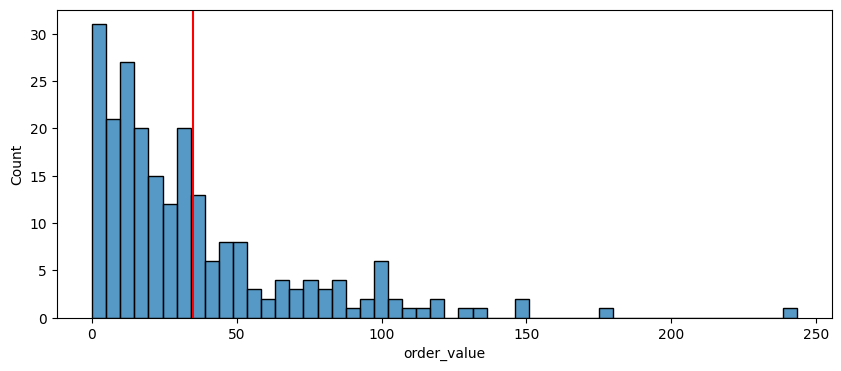

In [ ]:
plt.figure(figsize = (10,4))
sns.histplot(df['order_value'], bins = 50)
#show mean in plot and add valuelabel
plt.axvline(df['order_value'].mean(), color = 'red')

In [ ]:
df['order_value'].mean()

34.83546167177734

In [ ]:
df['order_value'].median()

24.124407657116443

In [ ]:
#conduct T test
from scipy.stats import ttest_1samp
from statsmodels.stats.weightstats import ztest


In [ ]:
total_cost_per_user = 25
total_sample = len(df)


In [ ]:
t_statistic, p_value = ttest_1samp(a = df['order_value'], popmean = total_cost_per_user, alternative = 'greater')

In [ ]:
print(f'(t-statistic) : {t_statistic}')
print(f'(p-value) : {p_value:.10f}')



(t-statistic) : 4.088516490126454
(p-value) : 0.0000302663


In [ ]:
a = 0.05
if p_value < a:
  print("Reject Null Hypothesis (LAKSANAKAN), mean order is potentially bigger than 25")
else:
  print("Accept Null Hypothesis (tidak jadi LAKSANAKAN), mean order is not potentially bigger than 25")

Reject Null Hypothesis (LAKSANAKAN), mean order is potentially bigger than 25


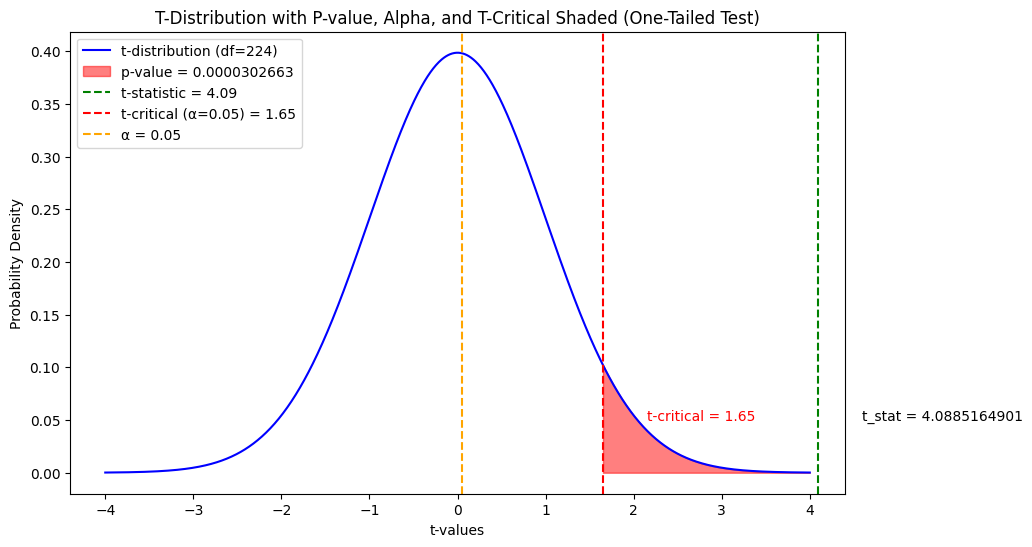

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Parameters for the t-distribution
df = len(df['order_value']) - 1  # degrees of freedom
t_statistic = t_statistic  # Using the calculated t-statistic from your test
p_value = p_value  # Calculated p-value
alpha = 0.05  # Significance level

# Calculate the critical t-value for a one-tailed test
t_critical = stats.t.ppf(1 - alpha, df)  # One-tailed test, hence we use 1-alpha

# Generate x-axis values for plotting the t-distribution
x = np.linspace(-4, 4, 1000)

# Plotting the t-distribution
plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=stats.t.pdf(x, df), color='blue', label=f't-distribution (df={df})')

# Shading the p-value region (area greater than the t-statistic)
x_fill = np.linspace(t_critical, 4)
plt.fill_between(x_fill, stats.t.pdf(x_fill, df), color='red', alpha=0.5, label=f'p-value = {p_value:.10f}')

# Add a vertical line for the calculated t-statistic
plt.axvline(t_statistic, color='green', linestyle='--', label=f't-statistic = {t_statistic:.2f}')

# Add a vertical line for the critical t-value
plt.axvline(t_critical, color='red', linestyle='--', label=f't-critical (α={alpha}) = {t_critical:.2f}')

# Add significance level line
plt.axvline(alpha, color='orange', linestyle='--', label=f'α = {alpha:.2f}')  # If you want to keep this line

# Adding text for alpha and p-value
plt.text(t_statistic + 0.5, 0.05, f't_stat = {t_statistic:.10f}', color='black', fontsize=10)
plt.text(t_critical + 0.5, 0.05, f't-critical = {t_critical:.2f}', color='red', fontsize=10)
#add text to t_statistic



# Plot settings
plt.title('T-Distribution with P-value, Alpha, and T-Critical Shaded (One-Tailed Test)')
plt.xlabel('t-values')
plt.ylabel('Probability Density')
plt.legend()


# Show the plot
plt.show()


In [ ]:
df = pd.read_csv('/content/drive/My Drive/direct_email_advertising.csv')

In [7]:
df['Profit'] = df['order_value'] - 25

In [8]:
df

,email,order_date,order_value,Profit
0,Joanne.Lesch98@gmail.com,09-02-2024,5.635641,-19.364359
1,Sylvia79@hotmail.com,12-02-2024,45.348933,20.348933
2,Eddie_Cummings84@hotmail.com,09-03-2024,10.286325,-14.713675
3,Sarah_Muller68@gmail.com,19-03-2024,25.682935,0.682935
4,Edmond35@yahoo.com,24-02-2024,0.494204,-24.505796
...,...,...,...,...
220,Neil_Klocko80@gmail.com,21-02-2024,14.201351,-10.798649
221,Julius.Ziemann25@yahoo.com,19-02-2024,26.550420,1.550420
222,Neil_Jones62@hotmail.com,05-02-2024,39.002991,14.002991
223,Renee_Parker@yahoo.com,27-03-2024,11.990914,-13.009086


In [9]:
mean_profit = df['Profit'].mean()
std_profit = df['Profit'].std()/np.sqrt(len(df))
degree_freedom = len(df)-1

In [10]:
from statsmodels.stats.weightstats import _tconfint_generic

In [11]:
ci_low, ci_high = _tconfint_generic(
    mean=mean_profit,
    std_mean=std_profit,  # Standard error
    dof=degree_freedom,
    alpha=0.01,  # 99% confidence level
    alternative='two-sided'
)

# Target profit
target_profit = 1000

# Results
ci_low, ci_high

(3.5857399918542, 16.08518335170047)

In [12]:
print(f'Confidence Interval Low per user: {ci_low}')
print(f'Confidence Interval High per user: {ci_high}')

Confidence Interval Low per user: 3.5857399918542
Confidence Interval High per user: 16.08518335170047


In [ ]:
print(f'Confidence Interval Low per 100 user: {ci_low*100}')
print(f'Confidence Interval High per 100 user: {ci_high*100}')

Confidence Interval Low per 100 user: 358.57399918542
Confidence Interval High per 100 user: 10358.128687062437


In [ ]:
df['Profit'].describe()

,Profit
count,225.000000
mean,9.835462
std,36.084464
min,-24.923868
25%,-14.077054
50%,-0.875592
75%,20.655997
max,218.277491
